# <font color="blue"> Instructions on using Colab </font>

1. You do not have permission to edit this original file. To start editing and save your changes, make a copy of the notebook and save it on your google drive (File-> Save a copy in Drive)(only one person in your group needs to do it). Then you can share this copy with your other teammates.
2. Everyone in your team can edit this notebook. You can view revision history under File -> Revision history. (Note, however, that the revision histroy will be deleted at some point unless you "pin" the revision: File -> save and pin revision.)
3. Please see the end of this notebook for submission instructions.

# Final Project (due Tue, June 10, 2025)

The final group project has two parts

- Part I is more similar to the HW projects, while
- Part II requires some more independence. It involves learning and comprehending a method from a paper, and to then implement it.

In contrast to the homework project, you are **not supposed to talk to anyone about the project outside of your group**. If you need help or advise, please contact us.

Any violation of these rules, and more generally, any suspected academic misconduct will be reported to Office of Student Support and Student Judicial Affairs.

Also be reminded about the [UC Davis code of academic conduct](https://ossja.ucdavis.edu/code-academic-conduct).


### List all the group members here

- 1
  - Student ID: 916577012
  - Student Name: Charles Zhang

- 2
  - Student ID:
  - Student Name: Vivian Wong

- 3
  - Student ID: 919523380
  - Student Name: Zi Zeng


- briefly describe the contribution of the individual group members here:

In [2]:
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
from keras.datasets import mnist # pip install keras, pip install tensorflow

## Load the digit image data MNIST

Each image is a digit with image size $28\times 28$

In [3]:
(train_X, train_y) = mnist.load_data()[0]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Because the original data set is very large, we only use a subset of the data set here.

In [4]:
digits_data = train_X[:5000].reshape(5000, -1)
digits_target = train_y[:5000]
digits_data.shape, digits_target.shape

((5000, 784), (5000,))

## Part I: Visualize the Principal Components

### (1) Pick you favorite digit from 0-9. In part I, we will only look at images of your selected digit.

In [20]:
# specify your favorite number
num = 4 
X = digits_data[digits_target == num]
print(X.shape)

(535, 784)


Let's show the mean image of your selected digit
$\bar{X} = \sum_{i=1}^n X^{(i)}$

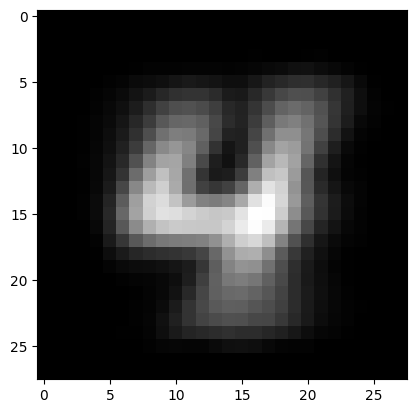

In [8]:
X_bar = X.mean(axis=0)
plt.imshow(X_bar.reshape((28, 28)), cmap='gray')
plt.show()

### (2) Visualize the 1st and 2nd principal component of your digit.
Visualize $w_1$ and $w_2$. They are both in $\mathbb{R}^{784}$ and can be visualized as images.

They are the two top eigenvectors corresponding to the largest and second largest eigenvalues of the covariance matrix. Equivalently, they are right singular vectors corresponding to the largest and second largest singular value of the **centered** data.

Therefore, you can use SVD or eigenvalue decomposition, or use the `PCA` method in `scikit-learn`.

In [21]:
def show_principal_components(k = 2):
    # calculate the first kth principal components, defined as W: np.ndarray
    # the ith of column of W is the ith principal component
    ##### your code starts here #####

    #center
    X_centered = X - X_bar
    
    # SVD
    U, s, Vt = np.linalg.svd(X_centered.T, full_matrices=False)
    W = U[:, :k]
    
    ##### your code ends here #####

    fig, ax = plt.subplots(1, k + 1)
    ax[0].imshow(X_bar.reshape((28, 28)), cmap="gray")
    ax[0].set_title("mean")
    ax[0].axis("off")
    for i in range(k):
        ax[i+1].imshow(W[:, i].reshape((28, 28)), cmap="gray")
        ax[i+1].set_title(f"{i+1}th PC")
        ax[i+1].axis("off")
    plt.show(fig)

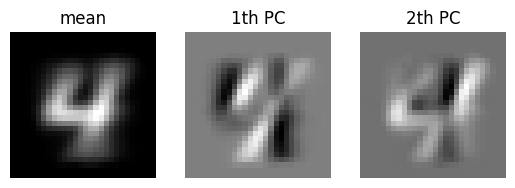

In [22]:
show_principal_components(k=2)

In [23]:
interact(show_principal_components)

interactive(children=(IntSlider(value=2, description='k', max=6, min=-2), Output()), _dom_classes=('widget-int…

<function __main__.show_principal_components(k=2)>

### (3) Visualize the projection scores

Make a 2D scatter plot of the first two principal components (the projection scores) $Z_1$, $Z_2 \in \mathbb{R}^n$, where $n$ is the number of data points in the data matrix $X$. Put the first PC score $Z_1$ on the $x$-axis.

Make a $5 \times 5$ "uniform" grid based on the marginal quantile of the scores. That is, the grid is spanned by

- ($\min(Z_1)$, 25th quantile of $Z_1$, median($Z_1$), 75th quantile of $Z_1$, $\max(Z_1)$)
  
and

- ($\min(Z_2)$, 25th quantile of $Z_2$, median($Z_2$), 75th quantile of $Z_2$, $\max(Z_2)$)

There are 25 cells in the grid. For each cell, mark the data point **closest to the midpoint**. So you will have 25 marked data points.

Hint: use `np.quantile` and `np.meshgrid`

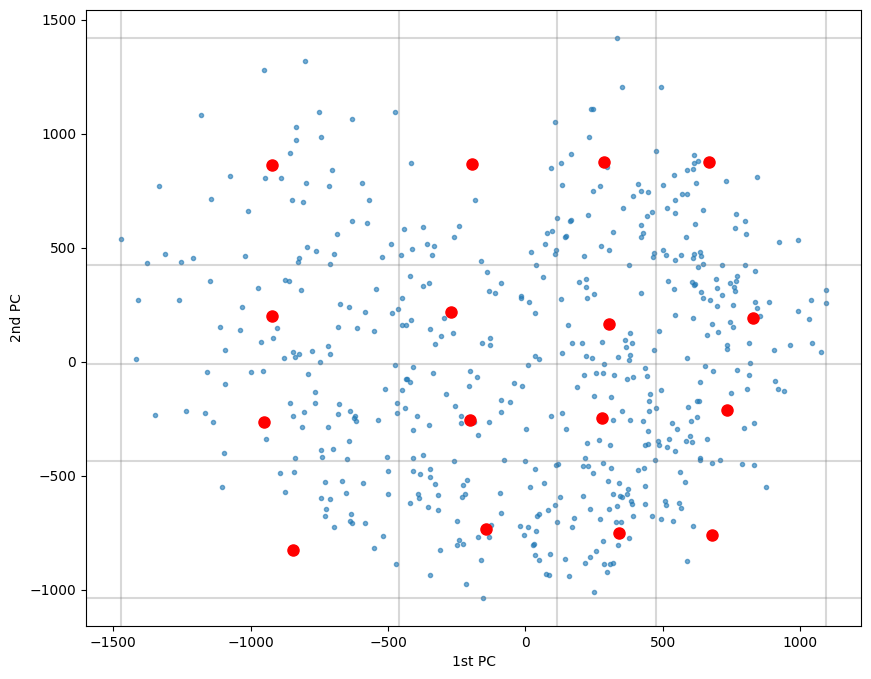

In [25]:
##### your code starts here #####

# calc proj scores
pca = PCA(n_components=2)
Z = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.plot(Z[:, 0], Z[:, 1], '.', alpha=0.6)

X_grid = np.quantile(Z[:, 0], [0, 0.25, 0.5, 0.75, 1])
Y_grid = np.quantile(Z[:, 1], [0, 0.25, 0.5, 0.75, 1])
xv, yv = np.meshgrid(X_grid, Y_grid)

# finding closest data points
marked_indices = []
marked_points = []

for i in range(4):
    for j in range(4):
        mid_x = (X_grid[i] + X_grid[i+1]) / 2
        mid_y = (Y_grid[j] + Y_grid[j+1]) / 2
        distances = np.sqrt((Z[:, 0] - mid_x)**2 + (Z[:, 1] - mid_y)**2)
        closest_idx = np.argmin(distances)
        marked_indices.append(closest_idx)
        marked_points.append([Z[closest_idx, 0], Z[closest_idx, 1]])

#some plotting of marked points
marked_points = np.array(marked_points)
plt.plot(marked_points[:, 0], marked_points[:, 1], 'ro', markersize=8, label='Marked points')

# grid lines
for x in X_grid:
    plt.axvline(x, color='gray', alpha=0.3)
for y in Y_grid:
    plt.axhline(y, color='gray', alpha=0.3)

##### your code ends here #####
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

Next make a figure with 4 $\times$ 4 subplots, each one displays the original image corresponding to the marked data point in the previous plot.

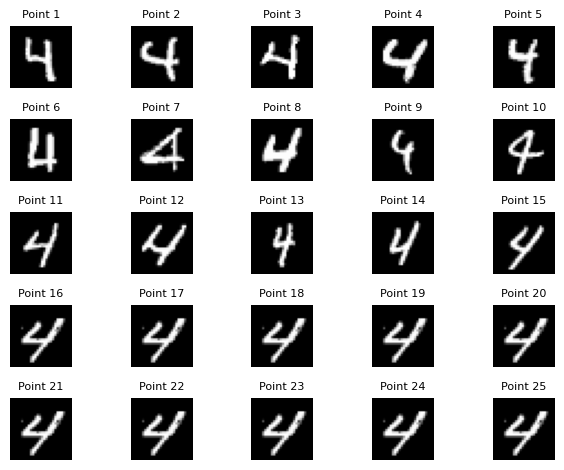

In [27]:
fig, ax = plt.subplots(5, 5)

##### your code starts here #####
while len(marked_indices) < 25:
    marked_indices.append(marked_indices[-1])

for i in range(5):
    for j in range(5):
        idx = i * 5 + j
        if idx < len(marked_indices):
            img = X[marked_indices[idx]].reshape((28, 28))
            ax[i, j].imshow(img, cmap='gray')
            ax[i, j].axis('off')
            ax[i, j].set_title(f'Point {idx+1}', fontsize=8)
        else:
            ax[i, j].axis('off')
plt.tight_layout()

##### your code ends here #####

plt.show(fig)

Do you see any pattern here? Can you explain it with the principal components you displayed in (3)?

### (4) How does the singular value of $X$ change with $k$?
First, make a plot of the singular values against $k$. Name the x-axis as "k", and the y-axis as "singular value".

Text(0, 0.5, 'singular value')

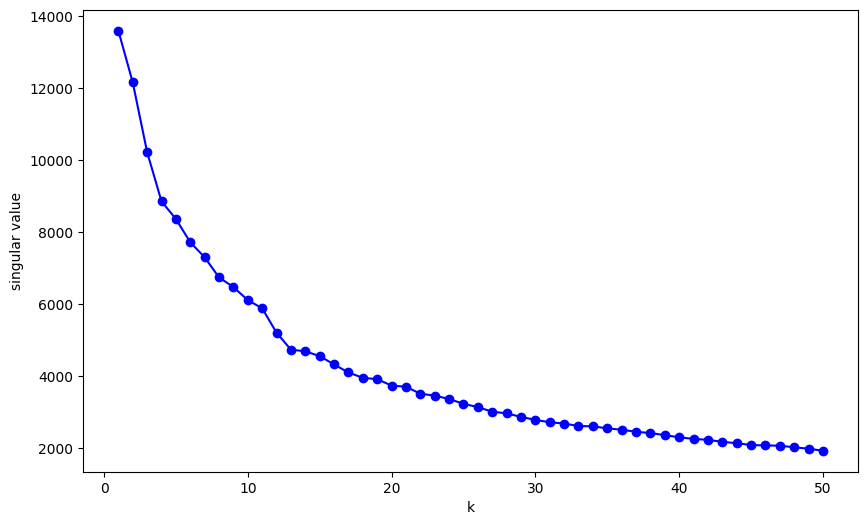

In [29]:
##### your code starts here #####
X_centered = X - X_bar
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)
k_values = range(1, min(50, len(s)) + 1)
plt.figure(figsize=(10, 6))
plt.plot(k_values, s[:len(k_values)], 'b-o', label='Original data')
plt.xlabel("k")
plt.ylabel("singular value")

##### your code ends here #####

You should see some type of an elbow shape, meaning a few of the largest principal components already explain a large proportion of variance in the image.

For comparison, let's now add another curve. For each image in $X$, randomly shuffle the entries. The image should look like random noise after the shuffling.

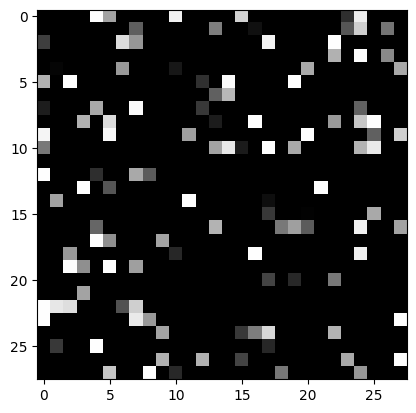

In [30]:
X_shuffle = X.copy()
##### your code starts here #####

for i in range(X_shuffle.shape[0]):
    np.random.shuffle(X_shuffle[i])

##### your code ends here #####
plt.imshow(X_shuffle[0].reshape((28, 28)), cmap="gray")
plt.show()

Then add another "singular value vs k" curve for `X_shuffle`, with different color. Add a label for each curve.

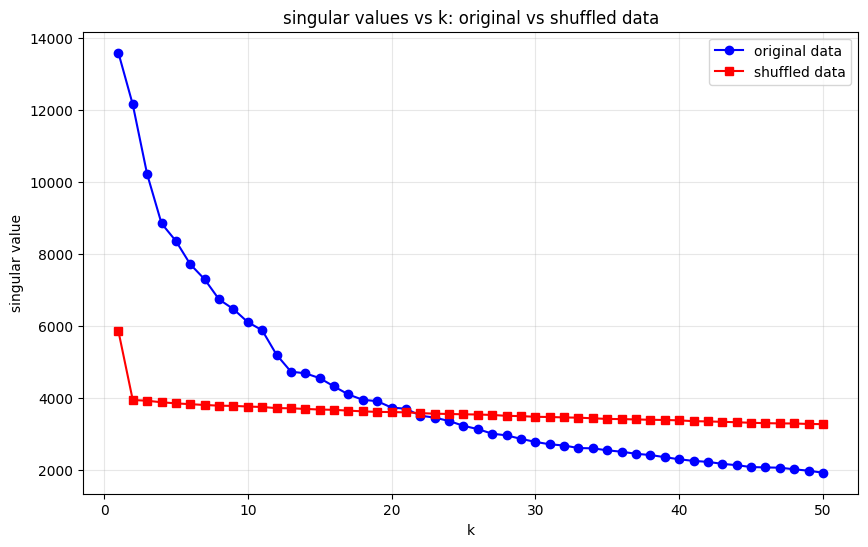

In [31]:
##### your code starts here #####

#svd calc
X_shuffle_centered = X_shuffle - X_shuffle.mean(axis=0)
U_shuffle, s_shuffle, Vt_shuffle = np.linalg.svd(X_shuffle_centered, full_matrices=False)

plt.figure(figsize=(10, 6))
plt.plot(k_values, s[:len(k_values)], 'b-o', label='original data')
plt.plot(k_values, s_shuffle[:len(k_values)], 'r-s', label='shuffled data')
plt.xlabel("k")
plt.ylabel("singular value")
plt.title("singular values vs k: original vs shuffled data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##### your code ends here #####

Discuss what you see:

### (5) Kernel Density Estimation -- tuning the `bandwidth`

We now apply PCA to the entire data set with $ k = 50$. `Z` is now the projection scores with shape (n, 50)

- Compute the kernel density estimator using `sklearn.neighbors.KernelDensity`. Here, let's simply use the Gaussian kernel and the Euclidean distance, and explore the effect of the `bandwidth` parameter. Discover the difference between using two different bandwidths, 0.1 and 200.

- Draw 16 new sample points from each fitted density using `KernelDensity.sample` (for comparison purpose, please use the same value for `random_state` for both bandwidths). Of course, these samples are in the space of projection scores. Use `pca.inverse_transform` to reconstruct digit images from these samples. Compare the sample digits drawn from density fitted with large bandwidth and small bandwidth. What are the differences? Could you give some intuitive explanations why you are seeing overlapping digits when `bandwidth` is large?

In [33]:
from sklearn.neighbors import KernelDensity

k = 50
pca = PCA(n_components=k)
Z = pca.fit_transform(digits_data)

def sample_digits(bandwidth: float = 1.0, n_samples:int = 16) -> np.ndarray:
    ##### your code starts here #####

    # fit kde
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(Z)
    
    #get samples
    Z_samples = kde.sample(n_samples, random_state=42)
    
    #make digits
    new_digits = pca.inverse_transform(Z_samples)
    
    # fix range
    new_digits = np.clip(new_digits, 0, 255)

    ##### your code ends here #####
    return new_digits # its shape should be (n_samples, 784)

new_digits_1 = sample_digits(bandwidth=0.1, n_samples=16).reshape((4, 4, -1))
new_digits_2 = sample_digits(bandwidth=200, n_samples=16).reshape((4, 4, -1))

In [34]:
def show_digits(new_digits: np.ndarray):
    '''
    new_digits have shape (4, 4, 784)
    '''
    fig, ax = plt.subplots(4, 4, subplot_kw=dict(xticks=[], yticks=[]))

    ##### your code starts here #####

    for i in range(4):
        for j in range(4):
            digit = new_digits[i, j].reshape((28, 28))
            ax[i, j].imshow(digit, cmap='gray')
            ax[i, j].axis('off')
    
    ##### your code ends here #####

    plt.show(fig)

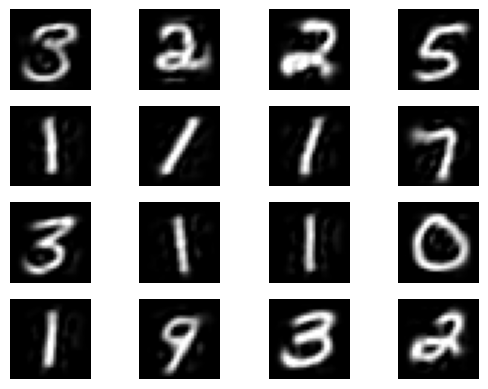

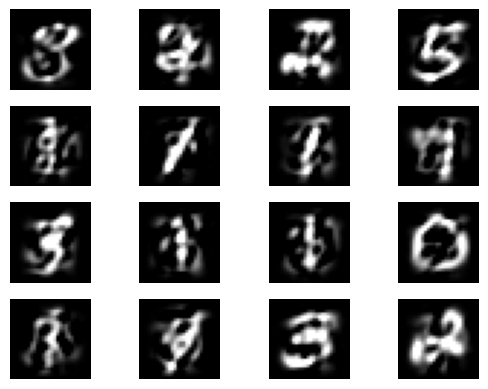

In [35]:
show_digits(new_digits_1)
show_digits(new_digits_2)

Use `sklearn.model_selection.GridSearchCV` to select the best bandwidth. Refit the model with the selected bandwidth, then draw another sample of 16 digits using that density. You can search for bandwidth within the choices `np.logspace(-1, 3, 20)`.

`GridSearchCV` (by default) uses the estimator's `score` method to evaluation performance on the test folds. In the case of `KernelDensity`, `score()` gives the log-likelihood of the test data in the estimated density. (Here it is the likelihood under the Gaussian mixture model (GMM))

best bandwidth selected by cv: 88.5867


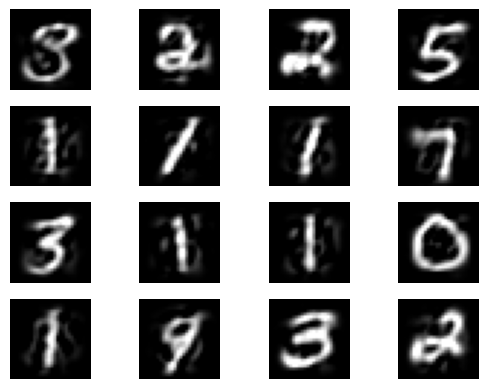

In [36]:
from sklearn.model_selection import GridSearchCV

##### your code starts here #####
#bandwidth num create
bandwidths = np.logspace(-1, 3, 20)
param_grid = {'bandwidth': bandwidths}

kde = KernelDensity(kernel='gaussian')

grid_search = GridSearchCV(kde, param_grid, cv=5, n_jobs=-1)
grid_search.fit(Z)

# get good bandwidth number
cv_selected_bandwidth = grid_search.best_params_['bandwidth']
print(f"best bandwidth selected by cv: {cv_selected_bandwidth:.4f}")

##### your code ends here #####

new_digits_cv = sample_digits(bandwidth=cv_selected_bandwidth, n_samples=16).reshape((4, 4, -1))
show_digits(new_digits_cv)

Note that your CV-selected bandwidth, which maximizes the likelihood on the test folds, does not necessarily look better than the previous choices. Could you (intuitively) explain why?

## Part II: Select the number of clusters using the *Gap statistic* ([Tibshirani et al., 2001b](hastie.su.domains/Papers/gap.pdf)).

This paper provides a statistical procedure to formalize the heuristic of the "elbow method", by looking at the gap between the change in within-cluster dispersion and its "expected" version.

The algorithm is described in detail in section 4 in the paper.

$$ \widehat{k} = \arg \min_k \{k\vert \mathrm{Gap}(k) \ge \mathrm{Gap}(k + 1) - s_{k+1}\}$$

### (a) Implement the algorithm.

Note the following:
- Your algorithm should take a general `X: np.ndarray` as input, with shape $(n, p)$.

- There are two choices of reference distribution mentioned in Section 4. You need to implement both of them. For example, in your function you can specify a parameter called `need_PCA`, if `need_PCA==True`, draw $B$ samples from the reference distribution (a). Otherwise, draw $B$ samples from the reference distribution (b). (By default, set $B = 50$.)

- For efficiency, you can specify an upper limit for $k$. Namely, only calculate Gap($k$) for $ 1 \le k \le$ `kmax`. If none of the considered $k$ satisfy $ \mathrm{Gap}(k) \ge \mathrm{Gap}(k + 1) - s_{k+1}$, then output a result that represents $k>$ `kmax` - 1, such as `np.inf` or `None`.

- Besides the selected $k$, you should also be able to output plots like in Fig. 2 of the [paper](hastie.su.domains/Papers/gap.pdf). Our data `X` in general has $p \ge 2$. Instead of the scatter plot (a) in Fig. 2, make a plot of $\textrm{Gap}(k) - \textrm{Gap}(k + 1) + s_{k+1}$ against $k$, so that $\hat{k}$ will be the smallest $k$ that gives a positive value of that curve. (You can add an horizontal dashed line at $y=0$)

Some suggestions for making the plots:
- Introduce a parameter named `need_plot` to control whether to make the plots, or simply output the selected $\hat{k}$.
- Use `plt.subplots((2,2))`. If you want to adjust the overall figure size, you can set e.g. `figsize=(10, 10)` in `subplot()`
- To show the error bars like in Fig 2 (d), you can use `plt.errorbar`.
- Specify what is your $x$-axis and what is your $y$-axis for each subplot. Make a title if necessary.

In [ ]:
from sklearn.cluster import KMeans

# This is an example of what your algorithm can look like.
# Of course you can define other helper functions, or even rewrite this function entirely from scratch,
# as long as you can output the selected k, and you can (optionally) output the plots.
def select_k_by_Gap_statistic(X: np.ndarray, kmax: int = 20, B: int = 50, need_PCA: bool = False, need_plot: bool =True) -> int:
    '''
    returns the number of clusters k selected by the Gap statistic. If the selected k is larger than kmax, return None.
    X has shape (n, p); n is the sample size; p is the number of features.
    kmax is maximum k whose Gap(k) will be computed
    B is the number of copies from the reference distribution
    need_PCA means whether to use the reference distribution (1) or (2)
    if need_plot = True, make the required plots. You can use plt.subplots().
    It is recommended to set a seed for generating the reference distributions,
    so that you can always reproduce the same results.
    '''
    ##### your code starts here #####










### (b) Apply the algorithm to the data containing only your favourite digit.

Use the original data as input. Then apply the algorithm, using two different reference distributions, respectively.

Following is some example code. Feel free to modify it.

In [ ]:
X = digits_data[digits_target == num]
B = 100
print(X.shape)

In [ ]:
select_k_by_Gap_statistic(X, kmax=20, B=B, need_PCA=True, need_plot=True)

In [ ]:
select_k_by_Gap_statistic(X, kmax=20, B=B, need_PCA=False, need_plot=True)

Answer the following questions:
- Before running the algorithm, what is your guess of the output $\hat{k}$? Is the selected $\hat{k}$ very different from what you expect?
- What differences do you see between outcomes using the two types of reference distributions? If their selected $\hat{k}$ are very different, could you provide some explanations?

### (c) We now apply the algorithm to the entire data set. But this time we will first transform the data by PCA.
For example, we first project the data to 10 principal component scores.

In [ ]:
pca_complete_dataset = PCA(n_components=10)
pca_complete_dataset.fit(digits_data)
X = pca_complete_dataset.transform(digits_data)
print(X.shape)

In [ ]:
select_k_by_Gap_statistic(X, kmax=20, B=B, need_PCA=True, need_plot=True)

In [ ]:
select_k_by_Gap_statistic(X, kmax=20, B=B, need_PCA=False, need_plot=True)

Note that now we obtain exactly the same results when using the two different reference distributions. Why?

### (d) Explore how the PCA projection dimension $d$ affects the $\hat k$ selected by the Gap statistic.


For each PCA projection dimension $d$ in `[1, 5, 10, 15, 20, 25, 40, 60]`, apply the Gap statistic and find the selected $\hat{k}$. Make a plot of $\hat{k}$ against $d$.

In [ ]:
# example code. You may modify it.
d_list = [1, 5, 10, 15, 20, 25, 40, 60]
k_hat_list = []
for d in d_list:
    pca_complete_dataset = PCA(n_components=d)
    pca_complete_dataset.fit(digits_data)
    X = pca_complete_dataset.transform(digits_data[:1000, ]) # reduce the sample size for efficiency
    k_hat = select_k_by_Gap_statistic(X, kmax=20, B=50, need_PCA=False, need_plot=False)
    k_hat_list.append(k_hat)
    print(f"PCA with {d} components. Selected k: {k_hat}")

plt.plot(d_list, k_hat_list, 'x-')
plt.xlabel(r'$d$')
plt.ylabel(r'$\hat k$')
plt.show()

Intuitively explain why you see $\hat{k}$ change with $d$ in this way.

### (e) Repeat (d) on the projection scores of your favorite digit. Again, make a plot of $\hat{k}$ against $d$.

Consider $d$ in `[2, 3, 5, 10, 15, 20, 25, 40]`.  Note that we use the PCA model *fitted on the entire data set*, but only use the projection scores of your favorite digit.

In [ ]:
# example code. You may modify it.
d_list = [2, 3, 5, 10, 15, 20, 25, 40]
k_hat_list = []
for d in d_list:
    pca_complete_dataset = PCA(n_components=d)
    pca_complete_dataset.fit(digits_data)
    X = pca_complete_dataset.transform(digits_data[digits_target == num, ]) # reduce the sample size for efficiency
    k_hat = select_k_by_Gap_statistic(X, kmax=20, B=50, need_PCA=False, need_plot=False)
    k_hat_list.append(k_hat)
    print(f"PCA with {d} components. Selected k: {k_hat}")

plt.plot(d_list, k_hat_list, 'x-')
plt.xlabel(r'$d$')
plt.ylabel(r'$\hat k$')
plt.show()

Intuitively explain why you see $\hat{k}$ change with $d$ in this way.

# <font color="blue"> Submission Instructions</font>

## if you choose to mainly work on Colab (recommended)
1. (If you haven't done so) File -> Save a copy in Drive.
2. Select Runtime -> Run All. This will run all the cells in order, and will take up to several minutes. <font color='red'>You will not get any grade if you don't follow this step strictly. This is to make sure that your code is executing the code without an error message.</font>
3. Make sure your outputs are generated correctly. Save again.
4. Share the file with
   - TA: mxsun@ucdavis.edu (Commenter)
5. You can choose from one of the following.
   - Select File -> Print, and your browser will allow you to save/print to pdf.
   - Select File -> Download -> Download .ipynb. Then follow Step 3 below. The pdf generate in the way below may be a little prettier as it shows the code blocks more distinctly.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly.
7. Submit your PDF on Gradescope.

## if you choose to work locally
1. Click the Save button at the top of the Jupyter Notebook.
2. Select Cell -> Run All. This will run all the cells in order, and will take up to several minutes. <font color='red'>You will not get any grade if you don't follow this step strictly. This is to make sure that your code is executing the code without an error message.</font>
3. Once you've re-run everything, select File -> Download as -> PDF via LaTeX (You would need to install [pandoc](https://pandoc.org/installing.html) and latex. See the link for instructions.) **Or, a simpler way is to select File -> Download as -> html**. But because gradescope only accepts PDF, you can use the web browser (e.g. Chrome) feature of print to PDF. Make sure that when doing so, place the html under the same folder with all you figures.
4. Look at the PDF file and make sure all your solutions are there, displayed correctly.
5. Submit your PDF on Gradescope.
7. Upload your final ipynb file (with all your solutions and all the outputs) to your google drive, open it with google colab, and then share it with
   - TA: mxsun@ucdavis.edu (Commenter)